<h1><center>PROYECTO - MODELO</center></h1>

## Librerias a utilizar

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Definición de metrica AMS

In [2]:
# Definimos la metrica AMS descrita por KAGGLE 
def ams(s,b): 
    return math.sqrt(2* ((s + b + 10) * math.log(1.0 + s/(b + 10)) - s))
                     
def cal_ams(weight, y, y_pred): 
    s = weight * (y == 1) * (y_pred ==1)
    b = weight * (y == 0) * (y_pred ==1)
    s = np.sum(s)
    b = np.sum(b)
    return ams(s,b)

## Datos

In [3]:
# Cargar datos de entrenamiento y testeo 
data = pd.read_csv("training.csv")

In [4]:
data

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [5]:
# Cambiar los label donde s-> 0 y b-> 1. La columna se va a llamar tag
data['Label'] = data["Label"].replace(["b","s"],[0,1] )

In [6]:
# Datos caracteristicas no deseadas y dato objetivo 
carac_no_deseadas = ['Label', 'EventId']

x = data.drop(carac_no_deseadas,axis = 1)
y = data['Label']

In [7]:
x

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,...,144.665,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083
249996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,...,80.408,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259
249997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,...,198.907,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636
249998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,...,112.718,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611


## Preprocesamiento de datos

In [8]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer

def preprocess(X_train, X_test):
    # Rellena la información con el valor más frecuente
    imputer = SimpleImputer(missing_values=-999.0, strategy='most_frequent')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # Standart Scaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test


## Datos entrenamiento y testeo 

In [9]:
from sklearn.model_selection import train_test_split

# Separar datos en entrenamiento y prueba

X_train, X_test, Y_train, Y_test = train_test_split(x, y ,test_size = 0.9, random_state = 33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(25000, 31) (225000, 31) (25000,) (225000,)


In [10]:
# Separar la columna Weight de los datos de entrenamiento y testeo 
X_train_weight = X_train['Weight']
X_train = X_train.drop('Weight', axis = 1)

X_test_weight = X_test['Weight']
X_test = X_test.drop('Weight', axis = 1)

In [11]:
# Aplicar preprocesamiento 
X_train, X_test = preprocess(X_train, X_test)

# Modelos 

## Primer Modelos: Arbol de Desiciones (dar una idea)

In [12]:
# Busqueda de mejores parametros
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42, min_samples_split= 2, criterion = 'entropy')
param_grid = {'min_samples_leaf': [4,6,8]}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=KFold(n_splits=10, shuffle=True), 
                           return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, Y_train, sample_weight = X_train_weight)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'min_samples_leaf': 4}
Mejor puntuación de validación cruzada:
0.7689999999999999


In [13]:
# Modelo decision tree con parametros optimizados
best_clf = grid_search.best_estimator_

In [14]:
# Predecimos Y
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

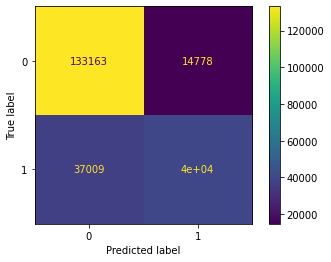

In [15]:
# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test,y_test_pred,labels=best_clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=best_clf.classes_).plot()

In [16]:
# Calculo de las predicciones en Train y test
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, classification_report
print('El accuracy en train es:',accuracy_score(Y_train,y_train_pred))
print('El accuracy en test es:', accuracy_score(Y_test,y_test_pred))

El accuracy en train es: 0.89644
El accuracy en test es: 0.7698355555555556


In [18]:
# Prueba de crossvalidation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_clf, x, y, cv=KFold(n_splits=10, shuffle=True))
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


In [19]:
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84    147941
           1       0.73      0.52      0.61     77059

    accuracy                           0.77    225000
   macro avg       0.76      0.71      0.72    225000
weighted avg       0.76      0.77      0.76    225000



In [20]:
feature_scores= pd.DataFrame(pd.Series(grid_search.best_estimator_.feature_importances_, index=pd.DataFrame(X_train).columns).sort_values(ascending=False)).T

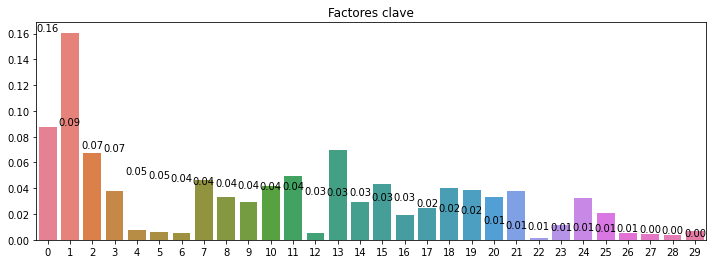

In [21]:
plt.figure(figsize=(12,4))
sns.barplot(data=feature_scores)

for index, value in enumerate(feature_scores.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave")
plt.show()

### Curva ROC

In [22]:
#Curva ROC y AUC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [23]:
ns_probs = [0 for _ in range(len(Y_test))]

# Predecimos las probabilidades entrenando con lr
best_clf_probs = best_clf.predict_proba(X_test)

#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
best_clf_probs = best_clf_probs[:, 1]

# Calculamos el AUC
ns_auc = roc_auc_score(Y_test, ns_probs)
best_clf_auc = roc_auc_score(Y_test, best_clf_probs)
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Arbol de Desiciones: ROC AUC=%.3f' % (best_clf_auc))

# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
best_clf_fpr, best_clf_tpr, _ = roc_curve(Y_test, best_clf_probs)

Sin entrenar: ROC AUC=0.500
Arbol de Desiciones: ROC AUC=0.774


In [24]:
# PR y F1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

best_clf_precision, best_clf_recall, _ = precision_recall_curve(Y_test, best_clf_probs)
best_clf_f1, best_clf_auc = f1_score(Y_test, y_test_pred), auc(best_clf_recall, best_clf_precision)
print('Arbol de Desiciones: auc=%.3f f1=%.3f ' % (best_clf_auc, best_clf_f1))
no_train = len(Y_test[Y_test==1]) / len(Y_test)
plt.figure(figsize=(20,15))

Arbol de Desiciones: auc=0.717 f1=0.607 


<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

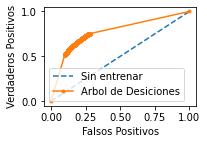

In [25]:
plt.subplot(2,2,1)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(best_clf_fpr, best_clf_tpr, marker='.', label='Arbol de Desiciones')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.legend()

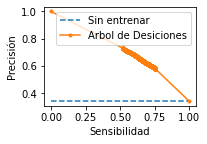

In [26]:
plt.subplot(2,2,2)
plt.plot([0, 1], [no_train, no_train], linestyle='--', label='Sin entrenar')
plt.plot(best_clf_recall, best_clf_precision, marker='.', label='Arbol de Desiciones')
#Etiquetas de ejes
plt.xlabel('Sensibilidad')
plt.ylabel('Precisión')
plt.legend()
plt.show()


# AMS del modelo 

In [27]:
cal_ams(X_test_weight, Y_test, y_test_pred)

1.8821517327252189

## Conclusiones de este modelo 

Algo que podemos observar de este modelo, es que, si tomamos un muestra pequeña para el entrenamiento, este se beneficia mucho para mejorar la metrica de AMS y tiene un decente accuracy y ROC AUC, pero sin embargo sufre un poco de overffiting. Esto nos nos dice que nos combiene usar un modelo ExtraTreesClassifier

## Segundo Modelo: ExtraTreesClassifier

### Modificacion de Datos entrenamiento y testeo 

In [28]:
from sklearn.model_selection import train_test_split

# Separar datos en entrenamiento y prueba

X_train, X_test, Y_train, Y_test = train_test_split(x, y ,test_size = 0.5, random_state = 22)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(125000, 31) (125000, 31) (125000,) (125000,)


In [29]:
# Separar la columna Weight de los datos de entrenamiento y testeo 
X_train_weight = X_train['Weight']
X_train = X_train.drop('Weight', axis = 1)

X_test_weight = X_test['Weight']
X_test = X_test.drop('Weight', axis = 1)

In [30]:
# Aplicar preprocesamiento 
X_train, X_test = preprocess(X_train, X_test)

### Implementación de modelo 

In [119]:
# Busqueda de mejores parametros
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV

# Definir el clasificador y los valores de los hiperparámetros a probar
model = ExtraTreesClassifier()

# Definir el clasificador y los valores de los hiperparámetros a probar
model = ExtraTreesClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy']}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(model, param_grid=param_grid, cv=KFold(n_splits=10, shuffle=True), 
                           return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, Y_train, sample_weight = X_train_weight)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'criterion': 'entropy'}
Mejor puntuación de validación cruzada:
0.831488


In [120]:
# Modelo decision tree con parametros optimizados
best_clf = grid_search.best_estimator_

In [121]:
# Predecimos Y
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

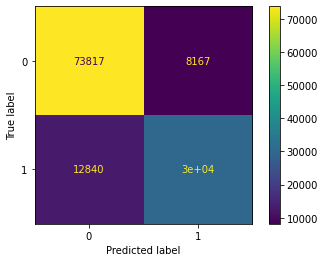

In [122]:
# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test,y_test_pred,labels=best_clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=best_clf.classes_).plot()

In [123]:
# Calculo de las predicciones en Train y test
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

In [124]:
from sklearn.metrics import accuracy_score, classification_report
print('El accuracy en train es:',accuracy_score(Y_train,y_train_pred))
print('El accuracy en test es:', accuracy_score(Y_test,y_test_pred))

El accuracy en train es: 1.0
El accuracy en test es: 0.831944


In [125]:
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88     81984
           1       0.79      0.70      0.74     43016

    accuracy                           0.83    125000
   macro avg       0.82      0.80      0.81    125000
weighted avg       0.83      0.83      0.83    125000



In [126]:
feature_scores= pd.DataFrame(pd.Series(grid_search.best_estimator_.feature_importances_, index=pd.DataFrame(X_train).columns).sort_values(ascending=False)).T

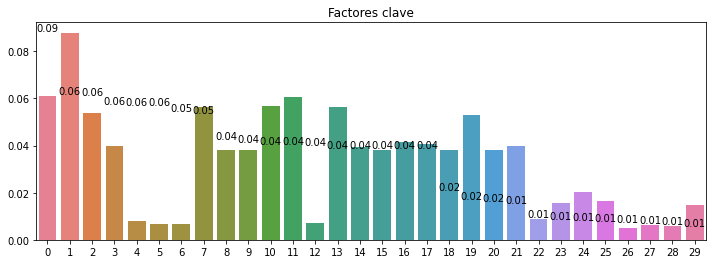

In [127]:
plt.figure(figsize=(12,4))
sns.barplot(data=feature_scores)

for index, value in enumerate(feature_scores.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave")
plt.show()

### Curva ROC

In [128]:
#Curva ROC y AUC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [129]:
ns_probs = [0 for _ in range(len(Y_test))]

# Predecimos las probabilidades entrenando con lr
best_clf_probs = best_clf.predict_proba(X_test)

#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
best_clf_probs = best_clf_probs[:, 1]

# Calculamos el AUC
ns_auc = roc_auc_score(Y_test, ns_probs)
best_clf_auc = roc_auc_score(Y_test, best_clf_probs)
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Arbol de Desiciones: ROC AUC=%.3f' % (best_clf_auc))

# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
best_clf_fpr, best_clf_tpr, _ = roc_curve(Y_test, best_clf_probs)

Sin entrenar: ROC AUC=0.500
Arbol de Desiciones: ROC AUC=0.896


In [130]:
# PR y F1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

best_clf_precision, best_clf_recall, _ = precision_recall_curve(Y_test, best_clf_probs)
best_clf_f1, best_clf_auc = f1_score(Y_test, y_test_pred), auc(best_clf_recall, best_clf_precision)
print('Arbol de Desiciones: auc=%.3f f1=%.3f ' % (best_clf_auc, best_clf_f1))
no_train = len(Y_test[Y_test==1]) / len(Y_test)
plt.figure(figsize=(20,15))

Arbol de Desiciones: auc=0.831 f1=0.742 


<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

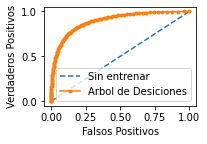

In [131]:
plt.subplot(2,2,1)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(best_clf_fpr, best_clf_tpr, marker='.', label='Arbol de Desiciones')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.legend()

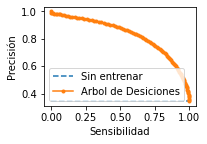

In [132]:
plt.subplot(2,2,2)
plt.plot([0, 1], [no_train, no_train], linestyle='--', label='Sin entrenar')
plt.plot(best_clf_recall, best_clf_precision, marker='.', label='Arbol de Desiciones')
#Etiquetas de ejes
plt.xlabel('Sensibilidad')
plt.ylabel('Precisión')
plt.legend()
plt.show()


# AMS del modelo 

In [133]:
cal_ams(X_test_weight, Y_test, y_test_pred)

2.036614194118988

## Tercer Modelo: AdaBoostClassifier (usando )

### Modificacion de Datos entrenamiento y testeo 

In [134]:
from sklearn.model_selection import train_test_split

# Separar datos en entrenamiento y prueba

X_train, X_test, Y_train, Y_test = train_test_split(x, y ,test_size = 0.9, random_state = 33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(25000, 31) (225000, 31) (25000,) (225000,)


In [135]:
# Separar la columna Weight de los datos de entrenamiento y testeo 
X_train_weight = X_train['Weight']
X_train = X_train.drop('Weight', axis = 1)

X_test_weight = X_test['Weight']
X_test = X_test.drop('Weight', axis = 1)

In [136]:
# Aplicar preprocesamiento 
X_train, X_test = preprocess(X_train, X_test)

### Implementación de modelo 

In [137]:
# Busqueda de mejores parametros
from sklearn.ensemble import AdaBoostClassifier

# Definir el clasificador y los valores de los hiperparámetros a probar
base_estimator =  ExtraTreesClassifier()
adaboost = AdaBoostClassifier(base_estimator=base_estimator,
                              n_estimators = 20,learning_rate = 0.75,)

# Modelo
best_clf = adaboost.fit(X_train, Y_train, sample_weight = X_train_weight)

In [138]:
# Predecimos Y
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

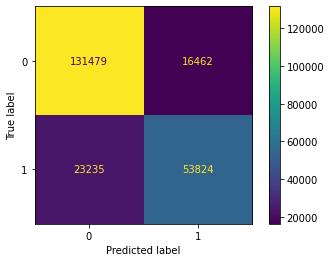

In [139]:
# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test,y_test_pred,labels=best_clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=best_clf.classes_).plot()

In [140]:
# Calculo de las predicciones en Train y test
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score, classification_report
print('El accuracy en train es:',accuracy_score(Y_train,y_train_pred))
print('El accuracy en test es:', accuracy_score(Y_test,y_test_pred))

El accuracy en train es: 1.0
El accuracy en test es: 0.8235688888888889


In [142]:
# Prueba de crossvalidation 
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(best_clf, x, y, cv=KFold(n_splits=10, shuffle=True))
#print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [143]:
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87    147941
           1       0.77      0.70      0.73     77059

    accuracy                           0.82    225000
   macro avg       0.81      0.79      0.80    225000
weighted avg       0.82      0.82      0.82    225000



In [144]:
feature_scores= pd.DataFrame(pd.Series(grid_search.best_estimator_.feature_importances_, index=pd.DataFrame(X_train).columns).sort_values(ascending=False)).T

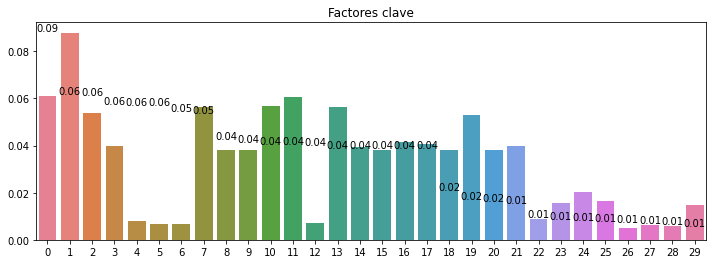

In [145]:
plt.figure(figsize=(12,4))
sns.barplot(data=feature_scores)

for index, value in enumerate(feature_scores.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave")
plt.show()

In [146]:
#plt.figure(figsize = (12,8))
#from sklearn import tree

#tree.plot_tree(best_clf.fit(X_train, Y_train))

### Curva ROC

In [147]:
#Curva ROC y AUC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [148]:
ns_probs = [0 for _ in range(len(Y_test))]

# Predecimos las probabilidades entrenando con lr
best_clf_probs = best_clf.predict_proba(X_test)

#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
best_clf_probs = best_clf_probs[:, 1]

# Calculamos el AUC
ns_auc = roc_auc_score(Y_test, ns_probs)
best_clf_auc = roc_auc_score(Y_test, best_clf_probs)
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Arbol de Desiciones: ROC AUC=%.3f' % (best_clf_auc))

# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
best_clf_fpr, best_clf_tpr, _ = roc_curve(Y_test, best_clf_probs)

Sin entrenar: ROC AUC=0.500
Arbol de Desiciones: ROC AUC=0.886


In [149]:
# PR y F1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

best_clf_precision, best_clf_recall, _ = precision_recall_curve(Y_test, best_clf_probs)
best_clf_f1, best_clf_auc = f1_score(Y_test, y_test_pred), auc(best_clf_recall, best_clf_precision)
print('Arbol de Desiciones: auc=%.3f f1=%.3f ' % (best_clf_auc, best_clf_f1))
no_train = len(Y_test[Y_test==1]) / len(Y_test)
plt.figure(figsize=(20,15))

Arbol de Desiciones: auc=0.815 f1=0.731 


<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

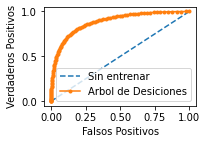

In [150]:
plt.subplot(2,2,1)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
plt.plot(best_clf_fpr, best_clf_tpr, marker='.', label='Arbol de Desiciones')
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.legend()

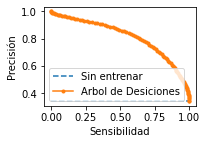

In [151]:
plt.subplot(2,2,2)
plt.plot([0, 1], [no_train, no_train], linestyle='--', label='Sin entrenar')
plt.plot(best_clf_recall, best_clf_precision, marker='.', label='Arbol de Desiciones')
#Etiquetas de ejes
plt.xlabel('Sensibilidad')
plt.ylabel('Precisión')
plt.legend()
plt.show()


# AMS del modelo 

In [152]:
cal_ams(X_test_weight, Y_test, y_test_pred)

2.637523621766222